# Introduction to Neural Network Classification

A classification is where you rey to classify something s one thing or another
A few type of classification problems:
* Binary classification
* Multiclass classification
* Multilabel classification


The following are some standard values you'll often use in your classification neural networks.

| **Hyperparameter** | **Binary Classification** | **Multiclass classification** |
| --- | --- | --- |
| Input layer shape | Same as number of features (e.g. 5 for age, sex, height, weight, smoking status in heart disease prediction) | Same as binary classification |
| Hidden layer(s) | Problem specific, minimum = 1, maximum = unlimited | Same as binary classification |
| Neurons per hidden layer | Problem specific, generally 10 to 100 | Same as binary classification |
| Output layer shape | 1 (one class or the other) | 1 per class (e.g. 3 for food, person or dog photo) |
| Hidden activation | Usually [ReLU](https://www.kaggle.com/dansbecker/rectified-linear-units-relu-in-deep-learning) (rectified linear unit) | Same as binary classification |
| Output activation | [Sigmoid](https://en.wikipedia.org/wiki/Sigmoid_function) | [Softmax](https://en.wikipedia.org/wiki/Softmax_function) |
| Loss function | [Cross entropy](https://en.wikipedia.org/wiki/Cross_entropy#Cross-entropy_loss_function_and_logistic_regression) ([`tf.keras.losses.BinaryCrossentropy`](https://www.tensorflow.org/api_docs/python/tf/keras/losses/BinaryCrossentropy) in TensorFlow) | Cross entropy ([`tf.keras.losses.CategoricalCrossentropy`](https://www.tensorflow.org/api_docs/python/tf/keras/losses/CategoricalCrossentropy) in TensorFlow) |
| Optimizer | [SGD](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/SGD) (stochastic gradient descent), [Adam](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) | Same as binary classification |

### Creating data to view and fit

In [60]:
from sklearn.datasets import make_circles

# Make 1000 example
n_samples = 1000

#Cretre circles

x, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42
                    )

In [61]:
#Checkout the features
x

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [62]:
#Check the label
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

### Our data is little hard to understand

In [63]:
import pandas as pd
circles = pd.DataFrame({"X0": x[:, 0], "X1": x[:,1], "label": y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


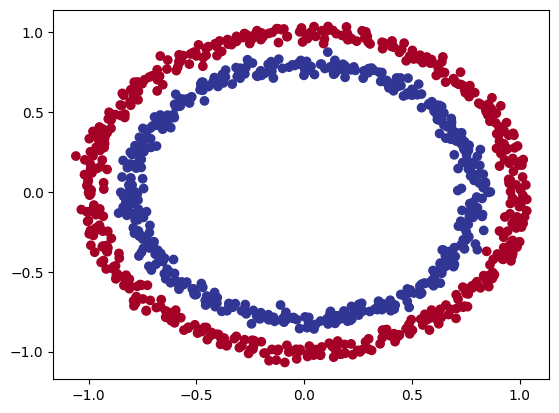

In [64]:
# Visualize with a plot
import matplotlib.pyplot as plt

plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.RdYlBu)

In [65]:
#Input and output shapes 

#chejc the shape of our features and labels

x.shape, y.shape

((1000, 2), (1000,))

In [66]:
#How many samples 
x[0], y[0]

(array([0.75424625, 0.23148074]), 1)

In [67]:
#Import tensorflow
import tensorflow as tf

### Steps in modeling
the steps in modelling with TensorFlow
* Create model
* Compile model
* Fit the model
* Evalute the model

In [68]:
#Set the random see
tf.random.set_seed(42)

#Crete the model 
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

#Fit the model

model_1.fit(tf.expand_dims(x, axis=-1), y, epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 1ms/step - loss: 1.7343 - accuracy: 0.4960
Epoch 2/5
32/32 [==============================] - 0s 1ms/step - loss: 0.7270 - accuracy: 0.5001
Epoch 3/5
32/32 [==============================] - 0s 1ms/step - loss: 0.7042 - accuracy: 0.5003
Epoch 4/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6972 - accuracy: 0.4993
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6948 - accuracy: 0.4972


In [69]:
#Lets try and improve our model
model_1.fit(tf.expand_dims(x, axis=-1), y, epochs=200, verbose=0)
model_1.evaluate(x,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934650540351868, 0.5]

#### Since we are working on a binary classification and model is getting around only 50%, so let's add another layer

In [70]:
#Set the random seeds
tf.random.set_seed(42)

#Create model 
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

#Complile the model
model_2.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["accuracy"]
)

#fit the model
model_2.fit(tf.expand_dims(x, axis=-1), y, epochs=100, verbose=0)

In [71]:
model_2.evaluate(x, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.5000


[0.6932472586631775, 0.5]

### Improving the model

Let's look into how to improve model

In [72]:
#Set the random seeds
tf.random.set_seed(42)

#Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=["accuracy"]
)

model_3.fit(tf.expand_dims(x, axis=-1), y, epochs=100, verbose=0)


In [73]:
model_3.evaluate(x, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6936 - accuracy: 0.5000


[0.69358229637146, 0.5]

#### To visualize model let's create the function
* Take in a trained model features (x) and labels (y)
* Create a meshgrid of the different x values
* Make preduction across the meshgrid
* Plot the prediction as well as a line between different zones

In [74]:
import numpy as np

In [75]:


def plot_decision_boundary (model, x, y):
    """
    Plots the decision boundary created by a model predicting on x
    1. https://cs231n.github.io/neural-networks-case-study/
    
    """

    #Desine the axis boundaries of the plot and create a meshgrid
    x_min, x_max = x[:, 0].min() - 0.1, x[:, 0].max()+ 0.1
    y_min, y_max = x[:, 1].min() - 0.1, x[:, 1].max()+ 0.1

    #mashgrid
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                        np.linspace(y_min, y_max, 100))

    #Create x value 
    x_in=np.c_[xx.ravel(), yy.ravel()] #Stack 2D arrays together

    #make prediction
    y_pred=model.predict(x_in)

    #check for multi-class
    if len(y_pred[0]) > 1 :
        print("doing multiclass classification")
        # we have to reshape our prediction to get then ready for plotting
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else: 
        print("doing binary classification")
        y_pred=np.round(y_pred).reshape(xx.shape)

    #Plot the decision boundary
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(x[:, 0], x[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 0s 1ms/step
doing multiclass classification


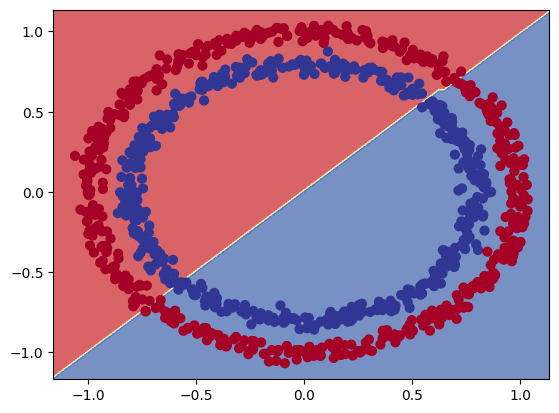

In [76]:
#check out the prediction our model iis making
plot_decision_boundary(model=model_3, x=x, y=y)



In [78]:
#Let's see if our model can be used for a regression problem

tf.random.set_seed(42)

#Create regression data
x_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5)

#Split our regression data into training and test data
x_reg_train=x_regression[:150]
x_reg_test = x_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

#Fit the model 
model_3.fit(tf.expand_dims(x_reg_train, axis=-1), y_reg_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 4ms/step - loss: -3795.4316 - accuracy: 0.0000e+00
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: -7190.0156 - accuracy: 0.0000e+00
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: -7190.0156 - accuracy: 0.0000e+00
Epoch 4/100
5/5 [==============================] - 0s 2ms/step - loss: -7190.0156 - accuracy: 0.0000e+00
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: -7190.0156 - accuracy: 0.0000e+00
Epoch 6/100
5/5 [==============================] - 0s 2ms/step - loss: -7190.0156 - accuracy: 0.0000e+00
Epoch 7/100
5/5 [==============================] - 0s 2ms/step - loss: -7190.0156 - accuracy: 0.0000e+00
Epoch 8/100
5/5 [==============================] - 0s 2ms/step - loss: -7190.0156 - accuracy: 0.0000e+00
Epoch 9/100
5/5 [==============================] - 0s 2ms/step - loss: -7190.0151 - accuracy: 0.0000e+00
Epoch 10/100
5/5 [==============================] - 0s 

We compiled our model to binary classification model but we are using regression problem.
So let's change the model to suit

In [84]:
#Set random seed
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

#compile the model 
model_4.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"]
)

#Fir the model

model_4.fit(tf.expand_dims(x_reg_train, axis=-1), y_reg_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 2s 5ms/step - loss: 511.2881 - mae: 511.2881
Epoch 2/100
5/5 [==============================] - 0s 10ms/step - loss: 409.6660 - mae: 409.6660
Epoch 3/100
5/5 [==============================] - 0s 8ms/step - loss: 312.0262 - mae: 312.0262
Epoch 4/100
5/5 [==============================] - 0s 7ms/step - loss: 210.7260 - mae: 210.7260
Epoch 5/100
5/5 [==============================] - 0s 6ms/step - loss: 105.0964 - mae: 105.0964
Epoch 6/100
5/5 [==============================] - 0s 53ms/step - loss: 53.2291 - mae: 53.2291
Epoch 7/100
5/5 [==============================] - 0s 8ms/step - loss: 77.8907 - mae: 77.8907
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: 64.2118 - mae: 64.2118
Epoch 9/100
5/5 [==============================] - 0s 3ms/step - loss: 44.9005 - mae: 44.9005
Epoch 10/100
5/5 [==============================] - 0s 4ms/step - loss: 49.0403 - mae: 49.0403
Epoch 11/100
5/5 [=============================

5/5 [==============================] - 0s 2ms/step


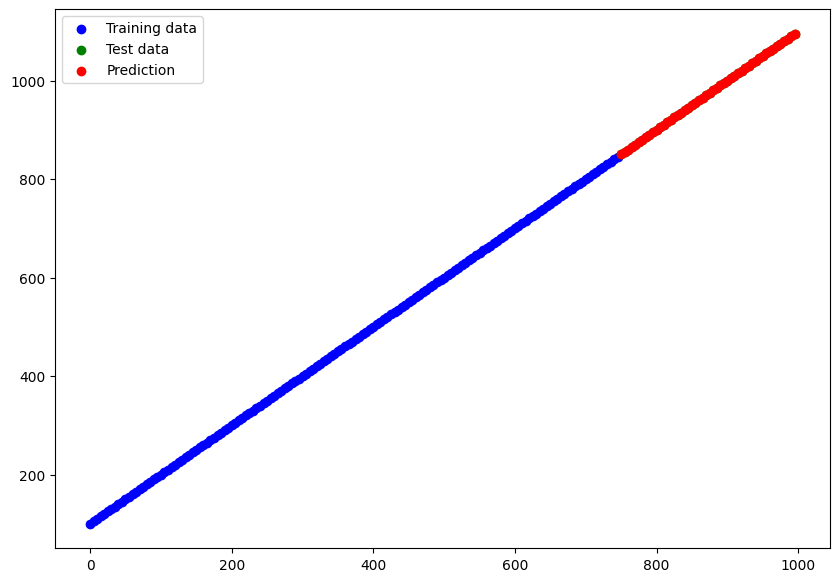

In [86]:
#Make predictions without trained model
y_reg_preds = model_4.predict(x_reg_train)

#Plot the model prediction agarinse our regression
plt.figure(figsize=(10,7))
plt.scatter(x_reg_train, y_reg_train, c="b", label="Training data")
plt.scatter(x_reg_test, y_reg_test, c="g", label="Test data")
plt.scatter(x_reg_test, y_reg_test, c="r", label="Prediction")
plt.legend()

## The missing piece: Non-linearity